# Build a simple model with Python

In this notebook we will create a simple decision tree model to classify countries into low and high happiness based on life expectancy and unemployment.  We will use a really tiny data set with just 12 rows.  This is unrealistic for any real machine learning, but it will help our learning.

In [1]:
# Import Python libraries for data manipuation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot

# Import the Python machine learning libraries we need
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Import some convenience functions.  This can be found on the course github
from functions import *

## Define the Task

"Use life expectancy and long-term unemployment rate to predict the perceived happiness (low or high) of inhabitants of a country."

## Acquire Clean Data

In [2]:
# Load the data set
dataset = pd.read_csv("world_data_really_tiny.csv")

## Understand the data

### Inspect the Data

In [3]:
# Inspect first few rows
dataset.head(12)

,country,lifeexp,unemployment,happiness
0,Albania,77.6,6.09,Low
1,Bulgaria,75.0,3.24,Low
2,Iran,75.8,2.11,Low
3,Ukraine,71.9,1.53,Low
4,South Africa,61.8,7.52,Low
5,Ukraine,71.9,1.53,Low
6,Austria,81.4,1.43,High
7,Croatia,77.3,5.53,High
8,Denmark,80.7,1.36,High
9,Serbia,75.7,4.96,High


In [4]:
# Inspect data shape
dataset.shape

(12, 4)

In [5]:
# Inspect descriptive stats
dataset.describe()

,lifeexp,unemployment
count,12.000000,12.000000
mean,74.833333,3.051667
std,5.213328,2.377664
min,61.800000,0.060000
25%,71.900000,1.412500
50%,75.750000,1.820000
75%,77.525000,5.102500
max,81.400000,7.520000


### Visualise

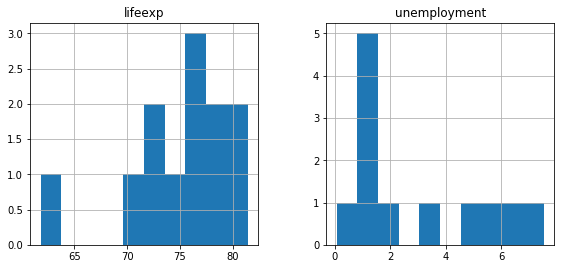

In [6]:
# View univariate histgram plots
histPlotAll(dataset)

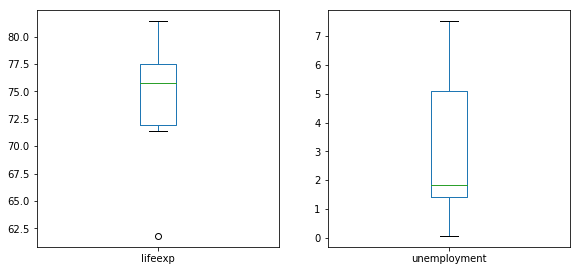

In [7]:
# View univariate box plots
boxPlotAll(dataset)

Comparative histograms for ['Low' 'High']


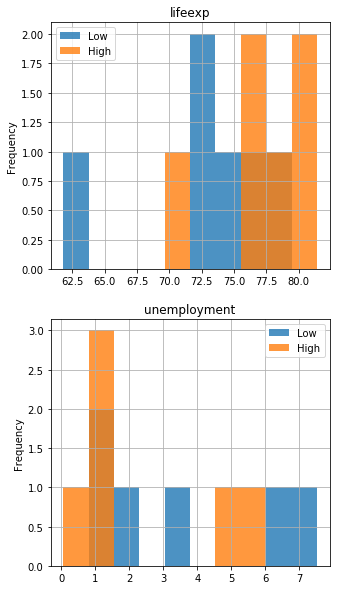

In [8]:
# View class split
classComparePlot(dataset[["happiness","lifeexp","unemployment"]], 'happiness', plotType='hist')

## Prepare the data for machine learning

### Select Features and Split into input and target features

In [9]:
# Split into input and output features
y = dataset["happiness"]
X = dataset[["lifeexp","unemployment"]]

In [10]:
X.head()

,lifeexp,unemployment
0,77.6,6.09
1,75.0,3.24
2,75.8,2.11
3,71.9,1.53
4,61.8,7.52


In [11]:
y.head()

0    Low
1    Low
2    Low
3    Low
4    Low
Name: happiness, dtype: object

## Build a model

### Split into test and training sets

In [12]:
# Split into test and training sets
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)

In [13]:
X_train

,lifeexp,unemployment
0,77.6,6.09
1,75.0,3.24
11,77.5,0.06
8,80.7,1.36
3,71.9,1.53
6,81.4,1.43
9,75.7,4.96
4,61.8,7.52


In [14]:
X_test

,lifeexp,unemployment
7,77.3,5.53
10,71.4,1.26
2,75.8,2.11
5,71.9,1.53


In [15]:
y_train

0      Low
1      Low
11    High
8     High
3      Low
6     High
9     High
4      Low
Name: happiness, dtype: object

In [16]:
y_test

7     High
10    High
2      Low
5      Low
Name: happiness, dtype: object

### Select an algorithm

In [17]:
# Select algorithm
model = DecisionTreeClassifier()

### Fit the model to the data

In [18]:
# Fit model to the data
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Check the model

In [19]:
# Check model performance on training data
predictions = model.predict(X_train)
print(accuracy_score(y_train, predictions))

1.0


## Evaluate the model

### Compute accuracy score

In [20]:
# Evaluate the model on the test data
predictions = model.predict(X_test)

In [21]:
# Look at the predictions
predictions

array(['Low', 'High', 'High', 'Low'], dtype=object)

In [22]:
# Compute the accuracy score
print(accuracy_score(y_test, predictions))

0.5


In [23]:
# Show the model predictions against the orginal data
df = X_test.copy()
df['Actual'] = y_test
df['Prediction'] = predictions
df

,lifeexp,unemployment,Actual,Prediction
7,77.3,5.53,High,Low
10,71.4,1.26,High,High
2,75.8,2.11,Low,High
5,71.9,1.53,Low,Low


## Examine the rules created by Sklearn

You may need to run the following install to see the decision tree visualisation:

<pre>conda install python-graphviz</pre>

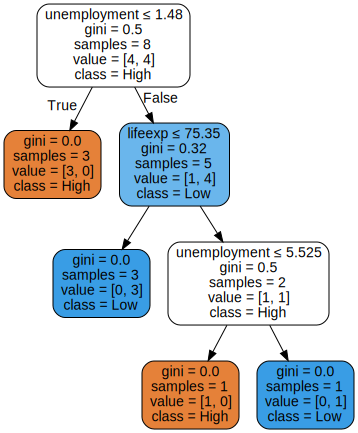

In [24]:
viewDecisionTree(model, X.columns)